In [3]:
# pip install tensorflow-gpu

In [1]:
print('Hello Python')

import os
import cv2
import imghdr
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# Model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, MaxPool2D, Activation, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

Hello Python


C:\Users\AMIT\AppData\Local\Temp\ipykernel_13668\406215041.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


Num GPUs Available:  0


# Setting up directory to save model

In [2]:
import os

In [3]:
os.makedirs('test_dir', exist_ok=True)

In [138]:
# define project name
projectName = "Emotion_Detection"

# List of Models 
model_names = [
    'Simple_CNN', 
    'CNN_with_Augmentation',
    'VGG16_Transfer_Learning',
    'ResNet50_Transfer_Learning'
]

base_dir = r"C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN"

# create project directories
project_dir = os.path.join(base_dir, projectName)
os.makedirs(project_dir, exist_ok=True)

# create subdirectory for each model

for model in model_names:
    model_dir = os.path.join(project_dir, model)
    os.makedirs(model_dir, exist_ok=True)

print("Project Folder: ", project_dir)

Project Folder:  C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\Emotion_Detection


# Data Cleaning

In [2]:
import cv2
import imghdr

C:\Users\AMIT\AppData\Local\Temp\ipykernel_7172\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [3]:
# list of acceptable image
img_acc = ['jpg', 'jpeg', 'png']

# Path to the directory containing image classes and possibly other nested subdirectorie
data_dir = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive'

# walk through all directories and files in data_dir
for root, dirs, files in os.walk(data_dir):
    for file in files:
        # construct path to the current file
        file_path = os.path.join(root,file)
        # print(file_path)

        try:
            # checking file type of current file
            file_type = imghdr.what(file_path)
            # check if file is not valid remove it
            if file_type not in img_acc:
                print(f'Image not in ext list {file_path}')
                # os.remove(file_path)
            else:
                # Proceed to process the image if needed, for example, reading it with OpenCV
                img = cv2.imread(file_path)
        except Exception as e:
            # Print out the issue and the path of the problematic file
            print(f'Issue with file {file_path}. Error: {e}')
            # Optionally, remove files that cause exceptions
            # os.remove(file_path)
        

# Data Analysis

In [3]:
import pandas as pd
import random

In [3]:

def count_files_in_directories(directory_path, directory_name):
    """
    function: count no of files present in directory_name
    return: dict, subdirectory(key):number(files count present in that subdirectory)
    """
    # Initialize dictionary to count files present in subdirectories of dircetory_name
    count = {}

    # print(os.listdir(directory_path)) return all files/folder(names) present in the input path
    for dirc in os.listdir(directory_path):
        # Cunstruct full path to that dir
        dir_path = os.path.join(directory_path, dirc)

        # checking dirc is directory or not
        if os.path.isdir(dir_path):
            # COunt no of files present in dirc
            count[dirc] = len(os.listdir(dir_path))

    # Convert the counts dictionary to a DataFrame for easy viewing and analysis.
    df = pd.DataFrame(count, index=[directory_name])
    return df

# path to the training dataset
train_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train'
# path to the testing dataset
test_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\test'

# Count the files in subdirectories of the training dataset and print result
train_count = count_files_in_directories(train_path, 'train')
print(train_count)
# Count the files in subdirectories of the testing dataset and print result
test_count = count_files_in_directories(test_path, 'test')
print(test_count)



       angry  disgust  fear  happy  neutral   sad  surprise
train   3995      436  4097   7215     4965  4830      3171
      angry  disgust  fear  happy  neutral   sad  surprise
test    958      111  1024   1774     1233  1247       831


In [4]:
train_count

,angry,disgust,fear,happy,neutral,sad,surprise
train,3995,436,4097,7215,4965,4830,3171


<Axes: >

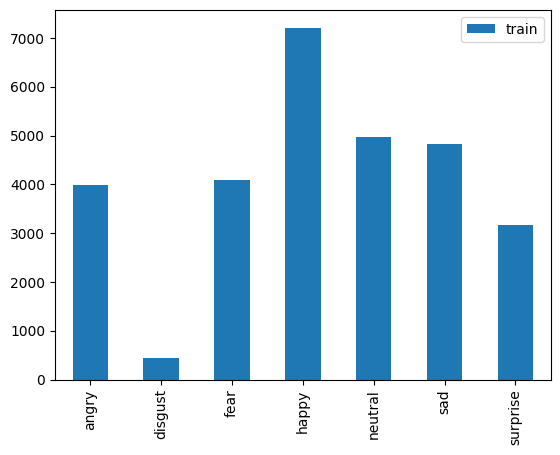

In [5]:
train_count.transpose().plot(kind='bar')

<Axes: >

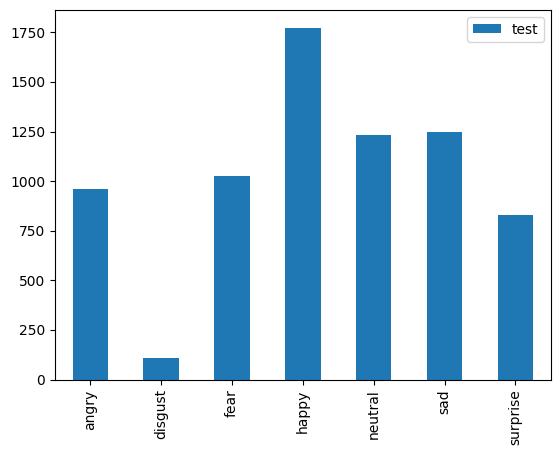

In [6]:
test_count.transpose().plot(kind='bar')

In [4]:
import matplotlib.pyplot as plt

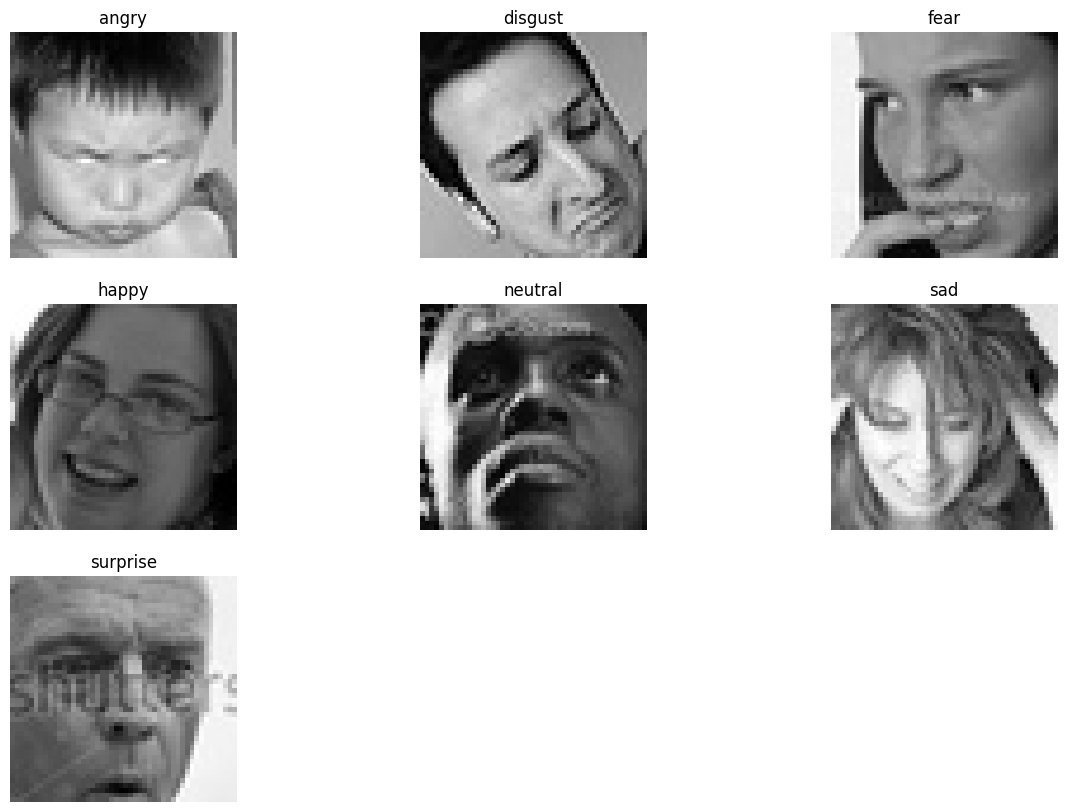

In [12]:
# Ploting Image of each Emotion
emotion = os.listdir(train_path)
plt.figure(figsize=(15, 10))

for index, drc in enumerate(emotion, 1):
    folder = os.path.join(train_path, drc)
    imgpath = os.path.join(folder, os.listdir(folder)[0])
    img = plt.imread(imgpath)
    plt.subplot(3, 3, index)
    plt.imshow(img, cmap='gray')
    plt.title(drc)
    plt.axis('off')
plt.show()

In [13]:
def plot_image_from_dirc(directory_path, class_name, num_img=3):
    # retrive the list of all files in the directory
    imgFileNames = os.listdir(directory_path)

    # If there are less images than num_img show all images
    if num_img>len(imgFileNames):
        print(f"Only found {len(imgFileNames)} images in {directory_path}, displaying them all.")
        num_img = len(imgFileNames)

    # randomly selected image
    selected_img = random.sample(imgFileNames, num_img)
    print(selected_img)

    # plotting the image
    fig, axes = plt.subplots(1, 3, figsize=(5, 5))
    axes = axes.ravel()

    for index, image_file in enumerate(selected_img):
        image_path = os.path.join(directory_path, image_file)
        image = plt.imread(image_path)
        axes[index].imshow(image, cmap='gray')
        axes[index].set_title(f"Image: {class_name}")
        axes[index].axis('off')  # Hide the axis
    plt.tight_layout()
    plt.show()

In [14]:
import numpy as np
l = np.array([[1,2,3], [4,5,6]])
print(l)
l.ravel()

[[1 2 3]
 [4 5 6]]


array([1, 2, 3, 4, 5, 6])

['Training_38178818.jpg', 'Training_85353164.jpg', 'Training_96206508.jpg']


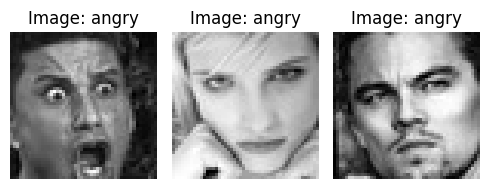

In [15]:
# Random Images from angry folder
angry_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\angry'
plot_image_from_dirc(angry_directory_path, 'angry', num_img=3)

['Training_49735203.jpg', 'Training_84519169.jpg', 'Training_81772924.jpg']


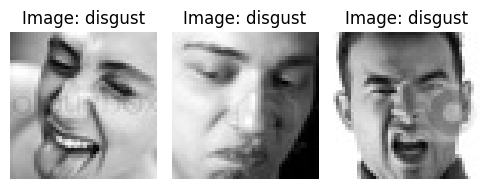

In [16]:
# Random Images from disgust folder
disgust_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\disgust'
plot_image_from_dirc(disgust_directory_path, 'disgust', num_img=3)

['Training_1674504.jpg', 'Training_64861797.jpg', 'Training_71858736.jpg']


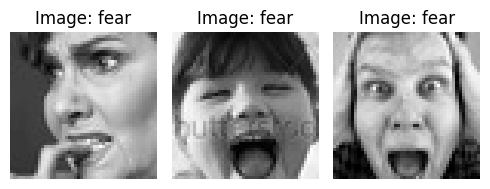

In [17]:
# Random Images from fear folder
fear_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\fear'
plot_image_from_dirc(fear_directory_path, 'fear', num_img=3)

['Training_13605151.jpg', 'Training_23294249.jpg', 'Training_96326297.jpg']


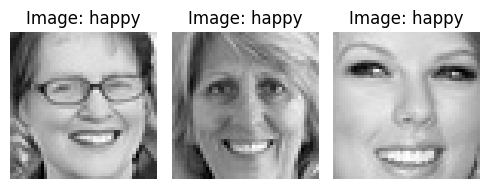

In [18]:
# Random Images from happy folder
happy_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\happy'
plot_image_from_dirc(happy_directory_path, 'happy', num_img=3)

['Training_84796312.jpg', 'Training_92030023.jpg', 'Training_53546653.jpg']


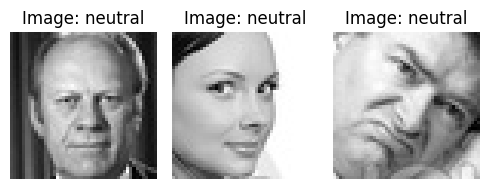

In [19]:
# Random Images from neutral folder
neutral_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\neutral'
plot_image_from_dirc(neutral_directory_path, 'neutral', num_img=3)

['Training_48092054.jpg', 'Training_89711494.jpg', 'Training_4688047.jpg']


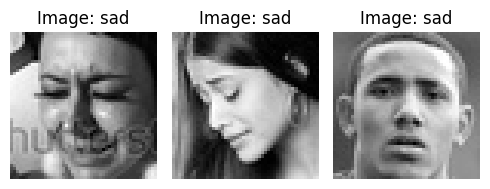

In [20]:
# Random Images from sad folder
sad_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\sad'
plot_image_from_dirc(sad_directory_path, 'sad', num_img=3)

['Training_68092968.jpg', 'Training_24121371.jpg', 'Training_98352897.jpg']


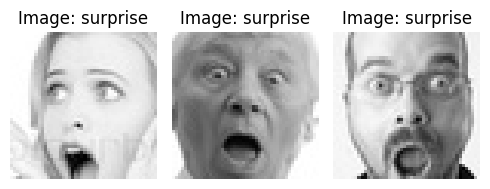

In [21]:
# Random Images from surprise folder
surprise_directory_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\surprise'
plot_image_from_dirc(surprise_directory_path, 'surprise', num_img=3)

In [22]:
# Checking shapes and channels
import numpy as np

imgpath = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train\surprise\Training_15323179.jpg'
image = plt.imread(imgpath)
image = np.array(image)
image.shape

(48, 48)

# Simple CNN Model

## Initialize Image Generator

In [23]:
# define paths of train and validation directories
train_data_dir = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\train'
test_data_dir = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\archive\test'

In [24]:
# default parameters
image_width, image_height = 48, 48
batch_size = 32
num_classes = 7

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
# Normalization of Image
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Automaticly retrive image and their classes for train and validation sets
train_generator = data_generator.flow_from_directory(
    directory=train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

validation_generator = data_generator.flow_from_directory(
    directory=train_data_dir,
    target_size=(image_width, image_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

test_generator = data_generator.flow_from_directory(
    directory=test_data_dir,
    target_size=(image_width, image_height),
    class_mode='categorical',
    color_mode='grayscale',
)


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [27]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [28]:
import time
start = time.time()
with tf.device("/device:CPU:0"):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)
print(time.time()-start)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
0.001683950424194336


In [29]:
import time
start = time.time()
with tf.device("/GPU:0"):
    a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
    b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
    c = tf.matmul(a, b)
    print(c)
print(time.time()-start)

tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)
0.002000570297241211


In [30]:
# Accessing class labels for the training data
train_class_labels = train_generator.class_indices
print("Training class labels:", train_class_labels)

# Accessing class labels for the testing data
test_class_labels = test_generator.class_indices
print("Testing class labels:", test_class_labels)

Training class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}
Testing class labels: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


In [31]:
# Model building

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, MaxPool2D, Activation, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', input_shape=(image_width, image_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', input_shape=(image_width, image_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', input_shape=(image_width, image_height, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(units=64))
model.add(Activation('relu'))
model.add(Dense(units=32))
model.add(Activation('relu'))

model.add(Dense(units=num_classes))
model.add(Activation('softmax'))

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4, 4, 128)           │              

 Total params: 560,167 (2.14 MB)

 Trainable params: 559,719 (2.14 MB)

 Non-trainable params: 448 (1.75 KB)

In [35]:
from tensorflow.keras.utils import plot_model

In [37]:
# plot_model(model, 
#            to_file=r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\Emotion_Detection\Simple_CNN\SimpleCNN_Architecture.png',
#            show_shape=True,
#            show_layer_names=True)

In [38]:
# Setting up Checkpoints 

# file path for the model checkpoints
cnn_path = r'C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\Emotion_Detection\Simple_CNN'
name = 'Simple_CNN.keras'
chk_path = os.path.join(cnn_path, name)
chk_path

'C:\\Users\\AMIT\\Hardik M\\Projects\\Emotion Detection Using CNN\\Emotion_Detection\\Simple_CNN\\Simple_CNN.keras'

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [47]:
# callback to save model checkpoint
checkpoint = ModelCheckpoint(filepath=chk_path, save_best_only=True, verbose=1, mode='min', monitor='val_loss')

# callback for EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)

# callback to reduce learning rate
reduceLRplt = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=6, verbose=1, min_delta=0.0001)

# callback to all log training data to a csv file
csvlogger = CSVLogger(os.path.join(cnn_path, 'simpleCNNTrainig.log'))

callbacks = [checkpoint, earlystopping, reduceLRplt, csvlogger]

In [48]:
# steps 
print(train_generator.samples)
train_steps_per_epoch = train_generator.samples // train_generator.batch_size +1
validation_steps_per_epoch = validation_generator.samples // train_generator.batch_size 
test_steps_epoch = test_generator.samples // test_generator.batch_size 
print(train_steps_per_epoch)
print(validation_steps_per_epoch)
print(test_steps_epoch)

22968
718
179
224


In [49]:
# Compiling the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# Model training

with tf.device("/GPU:0"):
    history = model.fit(train_generator,
                        # steps_per_epoch=train_steps_per_epoch,
                        epochs=20,
                        validation_data=validation_generator,
                        # validation_steps=validation_steps_per_epoch,
                        callbacks=callbacks)
    

Epoch 1/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.4365 - loss: 1.4431
Epoch 1: val_loss improved from inf to 1.36809, saving model to C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\Emotion_Detection\Simple_CNN\Simple_CNN.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 162s 211ms/step - accuracy: 0.4365 - loss: 1.4430 - val_accuracy: 0.4794 - val_loss: 1.3681 - learning_rate: 0.0010
Epoch 2/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.5131 - loss: 1.2708
Epoch 2: val_loss did not improve from 1.36809
718/718 ━━━━━━━━━━━━━━━━━━━━ 151s 210ms/step - accuracy: 0.5131 - loss: 1.2707 - val_accuracy: 0.4545 - val_loss: 1.4132 - learning_rate: 0.0010
Epoch 3/20
718/718 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.5490 - loss: 1.1793
Epoch 3: val_loss improved from 1.36809 to 1.22432, saving model to C:\Users\AMIT\Hardik M\Projects\Emotion Detection Using CNN\Emotion_Detection\Simple_CNN\Simple_CNN.keras
718/718 ━━━━━━━━━━━━━━━━━━━━ 150s 209ms/step - accuracy

In [51]:
# history = model.fit(train_generator,
#                         # steps_per_epoch=train_steps_per_epoch,
#                         epochs=10,
#                         validation_data=validation_generator,
#                         # validation_steps=validation_steps_per_epoch,
#                         callbacks=callbacks)

# Plotting Performance Metrics

In [52]:
def plotting_training_history(history):
    train_acc = history.history['accuracy']
    train_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']

    epoch_range = range(len(train_acc))

    plt.figure(figsize=(20, 5))

    # plot training and validation accuracy
    plt.subplot(1,2,1)
    plt.plot(epoch_range, train_acc, label='train_accuracy')
    plt.plot(epoch_range, val_acc, label='val_accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy Plot')

    # plot training and validation loss
    plt.subplot(1,2,2)
    plt.plot(epoch_range, train_loss, label='train_loss')
    plt.plot(epoch_range, val_loss, label='val_loss')
    plt.legend()
    plt.title('Training and Validation Loss Plot')

    plt.show()

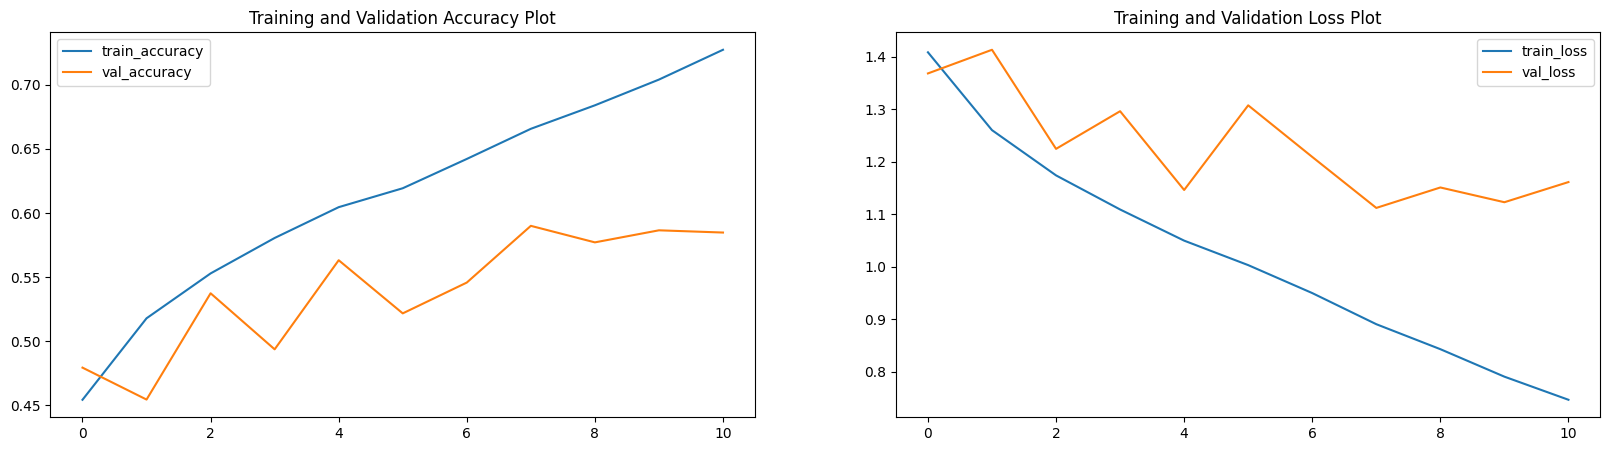

In [53]:
plotting_training_history(history)

# Model Evaluation

In [57]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc = model.evaluate(test_generator)
print(f"final train accuracy = {train_acc*100} , validation accuracy = {test_acc*100}")

718/718 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.7216 - loss: 0.7637
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.5898 - loss: 1.1157
final train accuracy = 72.26576209068298 , validation accuracy = 59.02758240699768


# Plotting Confusion Matrix

In [78]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

225/225 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step


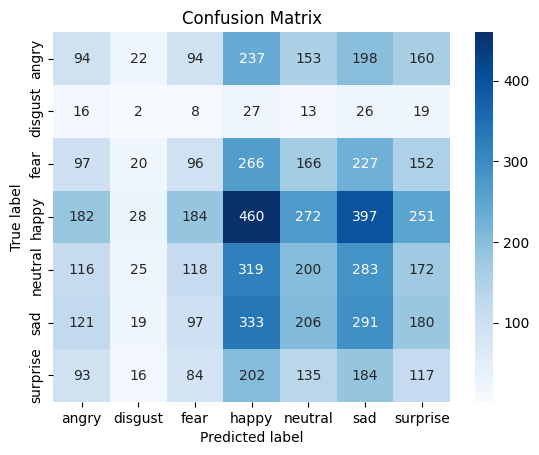

In [84]:
true_classes = test_generator.classes
predicted_classes = np.argmax(model.predict(test_generator, steps=np.ceil(test_generator.samples/test_generator.batch_size).astype('int')), axis=1)
class_labels = list(test_generator.class_indices.keys())

# generate confusion matrix
c_matrix = confusion_matrix(true_classes, predicted_classes)

# plotting with seaborn
sns.heatmap(c_matrix, annot=True, xticklabels=class_labels, yticklabels=class_labels, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [86]:
# generating classification_report
# Precision is defined as the ratio of correctly classified positive samples (True Positive) to a total number of classified positive samples 
# The recall measures the model's ability to detect positive samples.
print(classification_report(true_classes, predicted_classes, target_names=class_labels))

              precision    recall  f1-score   support

       angry       0.13      0.10      0.11       958
     disgust       0.02      0.02      0.02       111
        fear       0.14      0.09      0.11      1024
       happy       0.25      0.26      0.25      1774
     neutral       0.17      0.16      0.17      1233
         sad       0.18      0.23      0.20      1247
    surprise       0.11      0.14      0.12       831

    accuracy                           0.18      7178
   macro avg       0.14      0.14      0.14      7178
weighted avg       0.17      0.18      0.17      7178



# Making Prediction

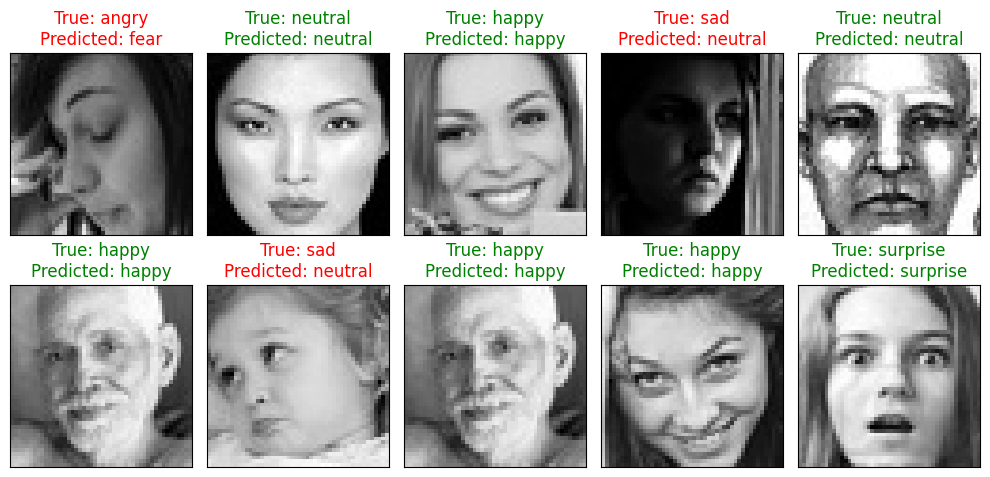

In [137]:
# Emotion classes for the dataset
emotion = class_labels

batch_size = test_generator.batch_size
# selection of random batch
random_batch = np.random.randint(0, len(test_generator)-1)
# selection of random image indices from batch_size
random_img_indices = np.random.randint(0, batch_size, 10)

# setting up plot
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
    # Fetching the random image and its label
    random_image = test_generator[random_batch][0][random_img_indices[i]]
    random_image_label = np.argmax(test_generator[random_batch][1][random_img_indices[i]])

    # making prediction over random fatched image
    model_prediction = np.argmax(model.predict(tf.expand_dims(random_image, axis=0), verbose=0))

    # display image
    ax.imshow(random_image.squeeze(), cmap='gray')
    # Setting the title with true and predicted labels, colored based on correctness
    color = 'green' if model_prediction == random_image_label else 'red'
    ax.set_title(f"True: {emotion[random_image_label]}\nPredicted: {emotion[model_prediction]}", color=color)

plt.tight_layout()
plt.show()